<a href="https://colab.research.google.com/github/damianunriza1/talento_tech/blob/main/Moda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()




In [16]:
training_images=training_images/255.0
test_images=test_images/255.0

In [17]:
model= keras.models.Sequential([
  keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
history=model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3774 - accuracy: 0.8665 - val_loss: 0.2902 - val_accuracy: 0.8928
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2515 - accuracy: 0.9078 - val_loss: 0.2694 - val_accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2074 - accuracy: 0.9239 - val_loss: 0.2749 - val_accuracy: 0.9054
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1747 - accuracy: 0.9348 - val_loss: 0.2417 - val_accuracy: 0.9154
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1445 - accuracy: 0.9468 - val_loss: 0.2577 - val_accuracy: 0.9136
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1199 - accuracy: 0.9554 - val_loss: 0.2799 - val_accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0992 - accuracy: 0.9630 - val_loss: 0.2772 -

In [21]:
loss, accuracy = model.evaluate(training_images, training_labels)
print(loss)
print(accuracy)

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0468 - accuracy: 0.9833
0.04679209366440773
0.9833499789237976


In [14]:
loss, accuracy = model.evaluate(x_train)
print(loss)
print(accuracy)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
0.0
0.0


In [22]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss)
print(accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.3723 - accuracy: 0.9140
0.3722931742668152
0.9139999747276306


In [23]:
index=1
print(f'Label: {test_labels[index]}')
Classification=model.predict(test_images[index:index+1])
print(f'Classification:\n{Classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 75ms/step
Classification:
[[2.9870625e-10]
 [1.1618165e-18]
 [1.0000000e+00]
 [3.9290633e-14]
 [1.0709258e-11]
 [2.1386086e-21]
 [2.2293940e-10]
 [8.4780925e-15]
 [1.1482695e-15]
 [6.5086880e-16]]


In [24]:
print(test_labels[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [25]:
FIRST_NAME=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(test_labels[FIRST_NAME])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

1
4
4


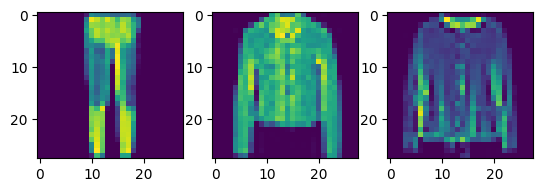

In [26]:
f, axarr= plt.subplots(1,3)
axarr[0].imshow(test_images[FIRST_NAME])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [27]:
layer=0
filter1=0
filter2=10

layer_outputs=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 28ms/step


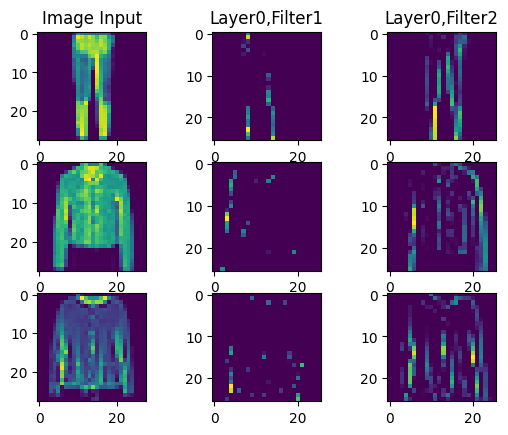

In [28]:
f, axarr= plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_NAME])
f1=activation_model.predict(test_images[FIRST_NAME].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+str(layer)+",Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+str(layer)+",Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
F2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(F2[0,:,:,filter1])
axarr[1,2].imshow(F2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
F3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(F3[0,:,:,filter1])
axarr[2,2].imshow(F3[0,:,:,filter2])